<a href="https://colab.research.google.com/github/VoznesenskayaV/LabOP/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%8219_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка исходных данных

In [1]:
# Импорт бибилиотеки для работы с файлами

from google.colab import files

In [2]:
# Загрузка исходных данных

uploaded = files.upload()

Saving Домашнее_задание_Бизнес_4_исходник.csv to Домашнее_задание_Бизнес_4_исходник.csv


In [3]:
import pandas as pd

In [7]:
# Получаем имя загруженного файла
filename = list(uploaded.keys())[0]

# Читаем файл с помощью pandas
df = pd.read_csv(filename, delimiter=';')

# 1. Исследование зависимости пользования предложением от идентификатора клиента

In [9]:
# Создаем новую колонку, содержащую последнюю цифру идентификатора клиента

df['right_symbol'] = df['id_client'].astype(str).str[-1]

In [10]:
# Преобразуем колонку с последней цифрой идентификатора в числовой формат
df['right_symbol'] = df['right_symbol'].astype(int)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

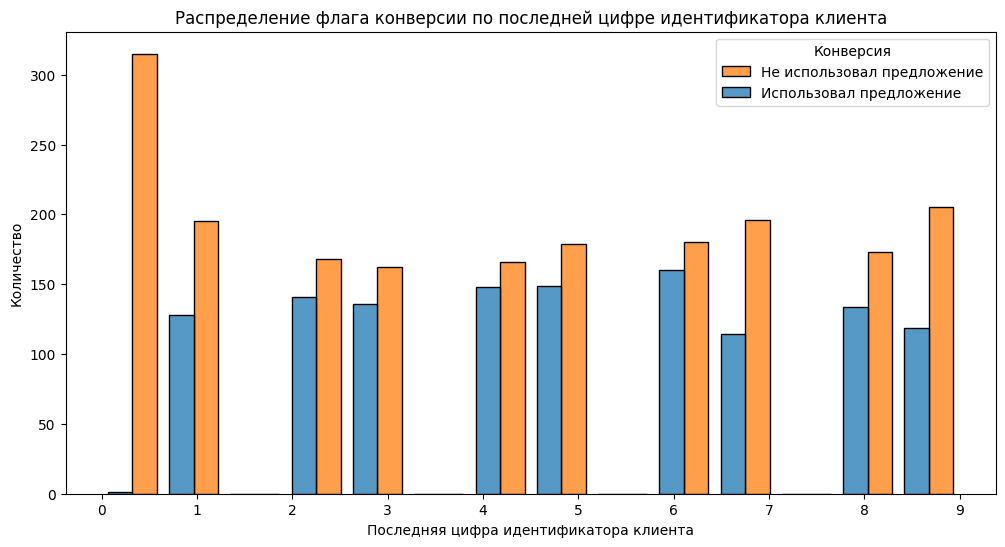

In [17]:
# Построение гистограммы
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='right_symbol', hue='flag_conv', multiple='dodge', shrink=0.8)
plt.title('Распределение флага конверсии по последней цифре идентификатора клиента')
plt.xlabel('Последняя цифра идентификатора клиента')
plt.ylabel('Количество')
plt.xticks(range(10))  # Обеспечивает, что метки оси X идут от 0 до 9
plt.legend(title='Конверсия', labels=['Не использовал предложение', 'Использовал предложение'])
plt.show()

Можем заметить, что клиенты с последней цифрой идентификатора 0 в основном не используют предложение.

# 2. Разбиение клиентов по группам (контроль и тест) в зависимости от остатка деления идентификатора на 10. Проведение AA_теста

In [18]:
# Создаем колонку с остатком от деления идентификатора на 10
df['mod_10'] = df['id_client'] % 10

In [19]:
# Разделяем на контрольную и тестовую группы
df['group'] = df['mod_10'] % 2

Теперь сравниваем среднюю конверсию между контрольной и тестовой группами:

In [20]:
import scipy.stats as stats

# Разделяем данные на контрольную и тестовую группы
control_group = df[df['group'] == 0]
test_group = df[df['group'] == 1]

In [21]:
# Рассчитываем среднюю конверсию для каждой группы
control_mean = control_group['flag_conv'].mean()
test_mean = test_group['flag_conv'].mean()

In [22]:
# Печатаем среднюю конверсию для каждой группы
print(f'Средняя конверсия в контрольной группе: {control_mean}')
print(f'Средняя конверсия в тестовой группе: {test_mean}')

Средняя конверсия в контрольной группе: 0.6317780580075663
Средняя конверсия в тестовой группе: 0.5919140871762476


In [23]:
# T-тест для проверки значимости разницы между группами
t_stat, p_value = stats.ttest_ind(control_group['flag_conv'], test_group['flag_conv'])

print(f'T-статистика: {t_stat}')
print(f'P-значение: {p_value}')

T-статистика: 2.303661902563631
P-значение: 0.021306090686166332


**Анализ результатов**:
* Средняя конверсия: Мы рассчитали среднюю конверсию для контрольной и тестовой
групп и вывели эти значения.
* T-тест: Мы провели T-тест, чтобы проверить, является ли разница между группами статистически значимой.
* P-значение: Если P-значение меньше 0.05, разница между группами считается статистически значимой. В противном случае разница не является значимой. В нашем случае P-значение равно 0.021306090686166332, следовательно разница между группами считается статистически значимой.

# 3. Разбиение клиентов по группам (контроль и тест) в зависимости от остатка деления идентификатора на 2. Проведение AA_теста

In [26]:
# Создаем колонку с четностью идентификатора
df['group'] = df['id_client'] % 2

In [27]:
# Разделяем данные на контрольную и тестовую группы
control_group = df[df['group'] == 0]
test_group = df[df['group'] == 1]

In [28]:
# Рассчитываем среднюю конверсию для каждой группы
control_mean = control_group['flag_conv'].mean()
test_mean = test_group['flag_conv'].mean()

In [29]:
# Печатаем среднюю конверсию для каждой группы
print(f'Средняя конверсия в контрольной группе (чётные id): {control_mean}')
print(f'Средняя конверсия в тестовой группе (нечётные id): {test_mean}')

Средняя конверсия в контрольной группе (чётные id): 0.6317780580075663
Средняя конверсия в тестовой группе (нечётные id): 0.5919140871762476


In [30]:
# T-тест для проверки значимости разницы между группами
t_stat, p_value = stats.ttest_ind(control_group['flag_conv'], test_group['flag_conv'])

In [31]:
print(f'T-статистика: {t_stat}')
print(f'P-значение: {p_value}')

T-статистика: 2.303661902563631
P-значение: 0.021306090686166332


In [32]:
# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
else:
    print("Результат не является статистически значимым: не отвергаем нулевую гипотезу.")

Результат статистически значим: отвергаем нулевую гипотезу.


# 4. Проведение 1000 АА-тестов с использованием sample

Теперь мы будем повторять разбиение и проведение АА-теста 1000 раз. Будем сохранять количество случаев, когда разница в конверсии оказывается статистически значимой:

In [34]:
# Инициализация переменной для подсчета значимых результатов
significant_count = 0

# Параметры
alpha = 0.05
n_iterations = 1000

In [35]:
# Проведение 1000 АА-тестов
for i in range(n_iterations):
    # Случайное разбиение на контрольную и тестовую группы
    df_sample = df.sample(frac=1).reset_index(drop=True)
    mid_point = len(df_sample) // 2
    control_group = df_sample.iloc[:mid_point]
    test_group = df_sample.iloc[mid_point:]

    # Рассчитываем среднюю конверсию для каждой группы
    control_mean = control_group['flag_conv'].mean()
    test_mean = test_group['flag_conv'].mean()

    # T-тест для проверки значимости разницы между группами
    t_stat, p_value = stats.ttest_ind(control_group['flag_conv'], test_group['flag_conv'])

    # Проверяем, является ли разница статистически значимой
    if p_value < alpha:
        significant_count += 1

In [36]:
# Рассчитываем процент случаев со значимой разницей
significant_percentage = (significant_count / n_iterations) * 100

print(f'Статистически значимая разница наблюдается в {significant_percentage}% случаев.')

Статистически значимая разница наблюдается в 4.8% случаев.


Процент случаев со статистически значимой разницей составляет 4.8%, что очень близко к ожидаемому значению 5%. Это означает, что методика случайного разбиения клиентов на контрольную и тестовую группы работает корректно. В идеале, с уровнем значимости α = 0.05, мы ожидаем, что статистически значимая разница будет наблюдаться примерно в 5% случаев просто из-за случайных колебаний.

# Задача со звездочкой

In [37]:
# Наблюдаемая пропорция
observed_proportion = 0.048

# Общее количество испытаний
n_iterations = 1000

# Критическое значение для 95%-го доверительного интервала
z_value = stats.norm.ppf(0.975)

In [38]:
# Вычисление стандартной ошибки
standard_error = (observed_proportion * (1 - observed_proportion) / n_iterations) ** 0.5

In [39]:
# Вычисление доверительного интервала
confidence_interval = (
    observed_proportion - z_value * standard_error,
    observed_proportion + z_value * standard_error
)

In [40]:
print(f'95%-й доверительный интервал: {confidence_interval}')

95%-й доверительный интервал: (0.0347508754149401, 0.061249124585059905)


In [41]:
# Проверка, включается ли 5% в доверительный интервал
if confidence_interval[0] <= 0.05 <= confidence_interval[1]:
    print("5% попадает в 95%-й доверительный интервал. Это подтверждает корректность наблюдаемой пропорции.")
else:
    print("5% не попадает в 95%-й доверительный интервал. Наблюдаемая пропорция может быть некорректной.")

5% попадает в 95%-й доверительный интервал. Это подтверждает корректность наблюдаемой пропорции.


# 5. Рассчет, сколько наблюдений потребуется для проведения АБ Теста, при условии что MDE = 2

In [45]:
import numpy as np

In [42]:
# Параметры
alpha = 0.05
beta = 0.20
power = 1 - beta
mde = 0.02  # минимально детектируемая разница
avg_conversion_rate = 0.5  # средняя конверсия, можно изменить, если известно точное значение

In [43]:
# Критические значения для нормального распределения
z_alpha = stats.norm.ppf(1 - alpha / 2)
z_beta = stats.norm.ppf(power)

In [46]:
# Стандартное отклонение конверсии
std_dev = np.sqrt(2 * avg_conversion_rate * (1 - avg_conversion_rate))

In [47]:
# Размер выборки для каждой группы
n = ((z_alpha + z_beta) * std_dev / mde) ** 2

In [48]:
print(f'Необходимое количество наблюдений в каждой группе: {int(np.ceil(n))}')

Необходимое количество наблюдений в каждой группе: 9812


# Интерпретация результата
Этот результат говорит о том, что для нашего A/B-теста необходимо иметь 9812 наблюдений в каждой группе (контрольной и тестовой), чтобы с вероятностью 80% (мощность теста) обнаружить разницу в конверсии в 2 процентных пункта (0.02) при уровне значимости 5% (α = 0.05).
* **Подробнее:**
1. Установленный MDE составляет 2 процентных пункта, что означает, что мы определяем, есть ли разница в конверсии между двумя группами, если она составляет хотя бы 2%.
2. Уровень значимости установлен на 5% (0.05), что означает, что мы готовы принять риск 5% на ложное обнаружение эффекта
3. Мощность теста установлена на 80% (0.80), что означает, что у нас будет 80% шансов обнаружить эффект, если он действительно существует
* **Итого:** Необходимо собрать данные о 9812 клиентах в каждой группе (всего 19624 наблюдений), чтобы провести корректный A/B-тест с указанными параметрами.
Это позволит уверенно утверждать, что разница в конверсии на уровне 2 процентных пункта действительно существует или отсутствует, основываясь на собранных данных.